# M5-W2 - Assignment: Stock Data Visualization

In your previous assignment you learned about what makes a better visualisation reproducing the given visualisations.<br>
Now your task is to create your visualisation based on a dataset.<br>
In this assignment you will be dealing with a dataset with historical stock prices (last 5 years) for all companies currently found on the S&P 500 index (an American stock market index). 

__Step 1:__ Load the dataset https://www.kaggle.com/camnugent/sandp500 into Python using pandas.<br> 

__Step 2:__ Pick stocks from 3 different companies and plot the open, close and volume of stocks for each of the companies. Think about how you want to build the visualizations (a few metrics in one plot or not, volumes of a few companies in one plot or not). Experiment with this and explain the story behind your visualizations.<br> 

__Step 3:__ Continue working with the 3 companies you chose. Create plots for each of them which will help you say something about the seasonality in the closing prices for these companies. (Hint: Seasonality refers to regular fluctuations, such as retail stores sales around the Christmas period. You may want to look at simple box plots of closing prices based on the day of the week, for example. Do not limit yourself to this suggestion). Experiment with this. 

## Step 1: Load the dataset into Python using pandas

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For Bokeh-Visualization
import bokeh
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure, ColumnDataSource

# For finance visualizations
import mplfinance as fplt

# Cufflinkz for other stock visualizations:
from plotly.offline import plot, iplot
import cufflinks as cf

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime as dt

output_notebook()

Loading BokehJS ...

In [40]:
dfc = pd.read_csv("all_stocks_5yr.csv")
dfc

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [41]:
print("Over the course of five years",len(dfc["Name"].unique()),"different companies have been in the S&P500.")

Over the course of five years 505 different companies have been in the S&P500.


## Step 2: Pick stocks from 3 different companies and plot the open, close and volume of stocks for each of the companies and explain the story behind your visualizations.

In [42]:
# Let's do the exercise with fresher data (instead of the old 5yrs data.csv) with the help of using Pandas DataReader-Package
# Let's select the tech stocks we'll use for this assignment

# We will select airline companies, since we want to look at covid impacts on this industry
# ALK = Alaska Air Group
# AAL = American Airlines Group
# DAL = Delta Air Lines Inc.
# LUV = Southwest Airlines
# UAL = United Airlines Holdings

# We will chose the largest three (ALK, LUV, UAL) by their current stockprice

tech_list = ['ALK', 'LUV', 'UAL']

# For the function we need to set up End and Start times for the data to be grabbed
end_time = dt.now()
start_time = dt(end_time.year - 5, end_time.month, end_time.day)


#For loop for grabing yahoo finance data and setting as a dataframe using the DataReader
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start_time, end_time)
    globals()[stock].reset_index(inplace=True)
    globals()[stock].rename(columns = {"Adj Close":"Adj_Close"}, inplace=True)
    
# Lets get, as comparison, the total S&P 500
sp500 = DataReader(['sp500'], 'fred', start_time, end_time)

In [32]:
sp500

,sp500
DATE,
2016-04-11,2041.99
2016-04-12,2061.72
2016-04-13,2082.42
2016-04-14,2082.78
2016-04-15,2080.73
...,...
2021-04-05,4077.91
2021-04-06,4073.94
2021-04-07,4079.95


In [43]:
ALK

,Date,High,Low,Open,Close,Volume,Adj_Close
0,2016-04-11,80.449997,78.470001,79.779999,78.480003,1423100.0,72.844566
1,2016-04-12,79.889999,78.750000,78.879997,79.250000,977500.0,73.559288
2,2016-04-13,82.000000,79.730003,80.029999,81.870003,1118500.0,75.991142
3,2016-04-14,83.260002,81.820000,82.139999,81.860001,1153200.0,75.981865
4,2016-04-15,82.550003,81.330002,81.849998,82.379997,1103900.0,76.464516
...,...,...,...,...,...,...,...
1254,2021-04-05,72.750000,70.489998,70.739998,71.089996,1427300.0,71.089996
1255,2021-04-06,73.900002,71.849998,72.440002,73.739998,2764200.0,73.739998
1256,2021-04-07,74.250000,71.720001,73.699997,72.360001,1246700.0,72.360001
1257,2021-04-08,72.949997,70.360001,71.779999,72.690002,1278600.0,72.690002


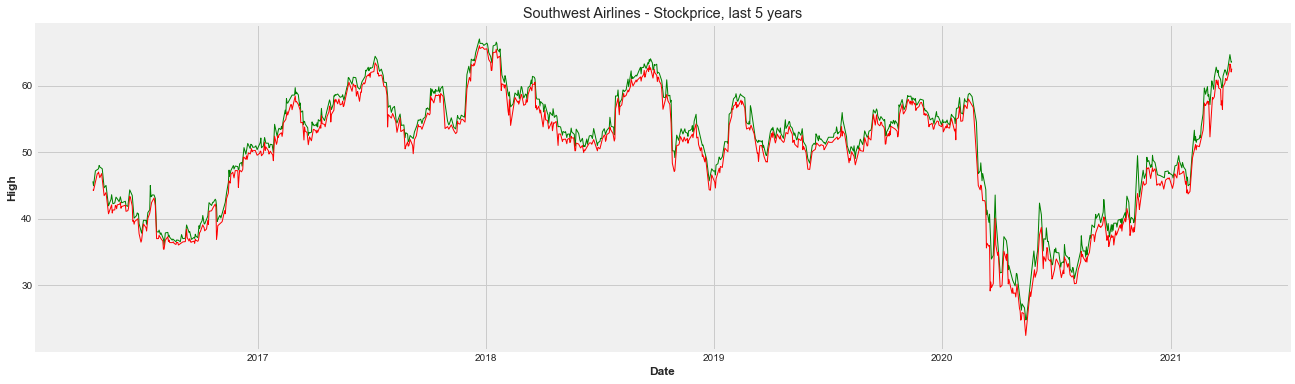

In [44]:
plt.figure(1,figsize=(20,6))
plt.title("Southwest Airlines - Stockprice, last 5 years")
sns.lineplot(x='Date', y='High', data = LUV, linewidth = 1, color = "green")
sns.lineplot(x='Date', y='Low', data = LUV, linewidth = 1, color = "red")
plt.show()
#sns.lineplot(x='Date', y='Open', data = LUV, linewidth = 1)
#sns.lineplot(x='Date', y='Close', data = LUV, linewidth = 1)

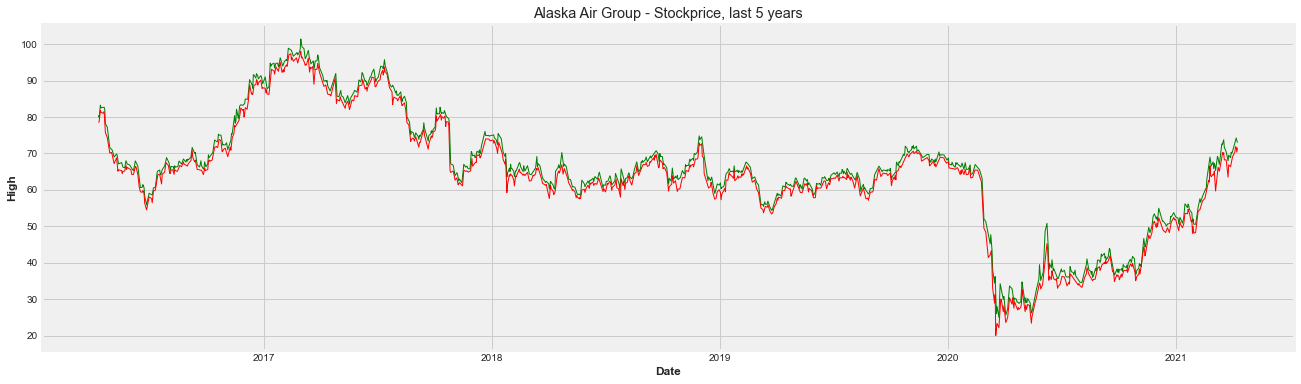

In [45]:
plt.figure(1,figsize=(20,6))
plt.title("Alaska Air Group - Stockprice, last 5 years")
sns.lineplot(x='Date', y='High', data = ALK, linewidth = 1, color = "green")
sns.lineplot(x='Date', y='Low', data = ALK, linewidth = 1, color = "red")
plt.show()

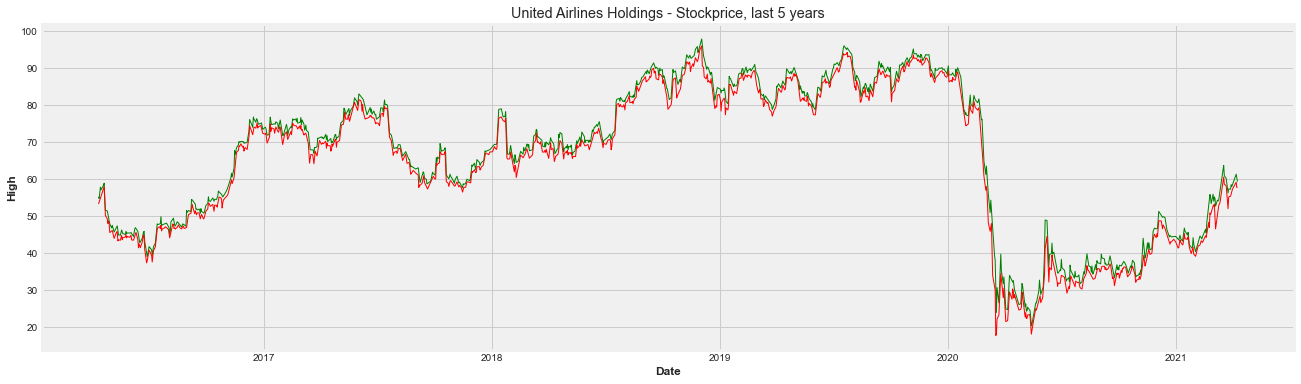

In [46]:
plt.figure(1,figsize=(20,6))
plt.title("United Airlines Holdings - Stockprice, last 5 years")
sns.lineplot(x='Date', y='High', data = UAL, linewidth = 1, color = "green")
sns.lineplot(x='Date', y='Low', data = UAL, linewidth = 1, color = "red")
plt.show()

In [58]:
# Now lets switch to Bokeh for visualizations:
# First define tooltips
# Add Tooltips
TOOLTIPS = [
    ("Value", '@Adj_Close'),
    ("Volume", '@Volume'),
]

p = figure(x_axis_type= "datetime", plot_width=1400, plot_height=500, title="", toolbar_location="below", tooltips = TOOLTIPS)

p.line('Date', 'Adj_Close', legend_label='ALK - Alaska Air Group', color='red', muted_color='green', muted_alpha=0.2, source=ColumnDataSource(data = ALK))
p.line('Date', 'Adj_Close', legend_label='LUV - Southwest Airlines', color='blue', muted_color='grey', muted_alpha=0.2, source=ColumnDataSource(data = LUV))
p.line('Date', 'Adj_Close', legend_label='UAL - United Airlines Holdings', color='green', muted_color='grey', muted_alpha=0.2, source=ColumnDataSource(data = UAL))

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Price'

p.legend.location = 'top_right'
p.legend.click_policy="mute"
show(p)

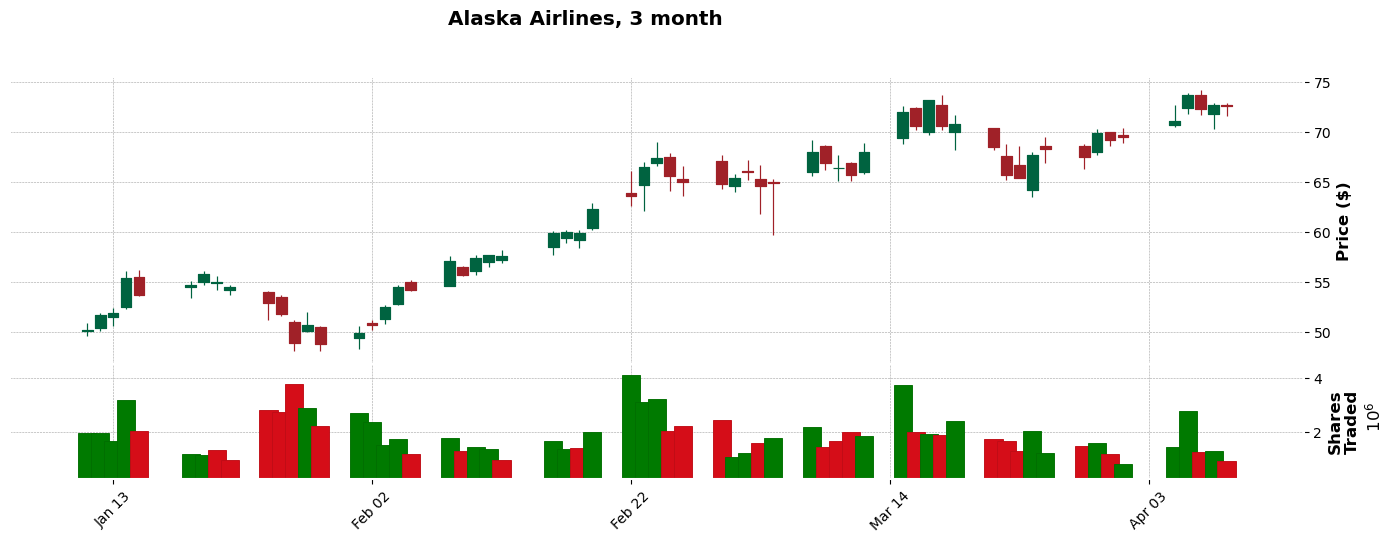

In [10]:
# Now lets switch to matplot-Finance for visualizations for the past 3 month:

# Reset the start and end time
end_time = dt.now()
start_time = dt(end_time.year, end_time.month-3, end_time.day)

# Therefor we need the Date as the index:
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start_time, end_time)

fplt.plot(
            ALK,
            type='candle',
            style='charles',
            title='Alaska Airlines, 3 month',
            ylabel='Price ($)',
            figratio=(25,8),
            volume=True,
            ylabel_lower='Shares\nTraded',
            show_nontrading=True,
            )

## Step 3: Create plots for each of the three chosen companies which will say something about the seasonality in the closing prices for these companies.

#### Lets check for seasonailty with the following hypothesis:
1. First, and most obviously, the COVID 19 pandemic has probably a huge impact to the stock prices. Especially due to the fact that there are hard travel restrictions in place
2. Secondly, people tend to travel more during weekends so we could maybe expect a peak of the stocks before the weekends
3. Thirdly, common holidays such as winter (last two weeks of Q4), easter (first two weeks of Q2) and summer breaks (mid four weeks of Q3) could have an influence on the airlines stockprices

#### Seasonality of Covid

In [122]:
# Let's first create a column which indicates if Covid was already spread in the US (1) or not (0)
ALK['Covid'] = np.where(ALK['Date']<"2020-02-21" ,0,1)
LUV['Covid'] = np.where(LUV['Date']<"2020-02-21" ,0,1)
UAL['Covid'] = np.where(UAL['Date']<"2020-02-21" ,0,1)
# Now quickly check if it worked (for one set)
ALK["Covid"].value_counts()

0    973
1    286
Name: Covid, dtype: int64

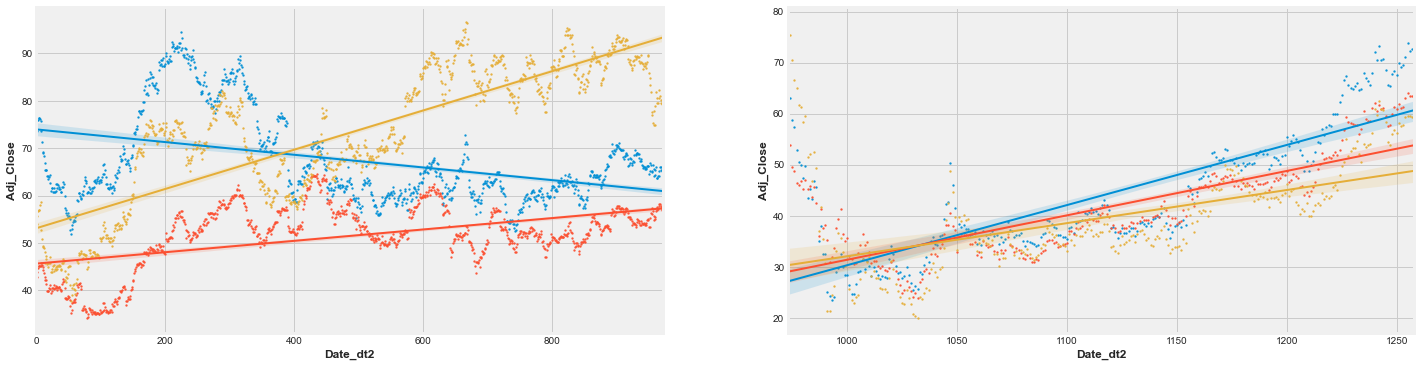

In [132]:
# Now lets look at the regression lines of these two seasons of post- and pre-Covid and compare them
plt.figure(1,figsize=(22, 6))

# First we have to convert the "Date" to float for the regression plot
ALK['Date_dt'] = pd.to_datetime(ALK['Date'],dayfirst = True)
ALK["Date_dt2"] = np.arange(len(ALK))

LUV['Date_dt'] = pd.to_datetime(LUV['Date'],dayfirst = True)
LUV["Date_dt2"] = np.arange(len(LUV))

UAL['Date_dt'] = pd.to_datetime(UAL['Date'],dayfirst = True)
UAL["Date_dt2"] = np.arange(len(UAL))

#Create the subplots
plt.subplot(1, 2, 1)

# s1 = sns.regplot(ALK[ALK["Covid"]==0]["Date_dt2"],  ALK[ALK["Covid"]==0]['Adj_Close'], lowess=True, color = "red")
s1 = sns.regplot(x="Date_dt2", y="Adj_Close", data=ALK[ALK['Covid']==0], line_kws={'linewidth':2}, scatter_kws={'s':2});
s2 = sns.regplot(x="Date_dt2", y="Adj_Close", data=LUV[LUV['Covid']==0], line_kws={'linewidth':2}, scatter_kws={'s':2});
s3 = sns.regplot(x="Date_dt2", y="Adj_Close", data=UAL[UAL['Covid']==0], line_kws={'linewidth':2}, scatter_kws={'s':2});


#Create the subplots
plt.subplot(1, 2, 2)

# s1 = sns.regplot(ALK[ALK["Covid"]==0]["Date_dt2"],  ALK[ALK["Covid"]==0]['Adj_Close'], lowess=True, color = "red")
s1 = sns.regplot(x="Date_dt2", y="Adj_Close", data=ALK[ALK['Covid']==1], line_kws={'linewidth':2}, scatter_kws={'s':2});
s2 = sns.regplot(x="Date_dt2", y="Adj_Close", data=LUV[LUV['Covid']==1], line_kws={'linewidth':2}, scatter_kws={'s':2});
s3 = sns.regplot(x="Date_dt2", y="Adj_Close", data=UAL[UAL['Covid']==1], line_kws={'linewidth':2}, scatter_kws={'s':2});


__Observations on Covid-Seasonality:__<br>
1. Trajectories of the airline companies where very different pre-Covid --> Probably company specific information defined the value development
2. Trends after Covid of the airline companies are all aligned and facing upwards with different slopes --> Post Covid recovery from the crash dominated the value development, independently of company specifics

#### Seasonality of Weekdays

In [82]:
# Lets define functions to group by Day, Month and Year
def by_day(df):
    df2 = df.groupby(df["Date"].dt.strftime('%A'))['Adj_Close'].mean().sort_values().reset_index()
    return df2

# def by_month(df):
#     df2 = df.groupby(df["Date"].dt.strftime('%B'))['Adj_Close'].mean().sort_values().reset_index()
#     return df2

# def by_year(df):
#     df2 = df.groupby(df["Date"].dt.strftime('%y'))['Adj_Close'].mean().sort_values().reset_index()
#     return df2

In [81]:
# Let's check if Covid has an impact of this analysis of weekdays
by_day(ALK[ALK['Covid']==0])

,Date,Adj_Close
0,Monday,67.239821
1,Thursday,67.394185
2,Tuesday,67.444398
3,Friday,67.445110
4,Wednesday,67.460711


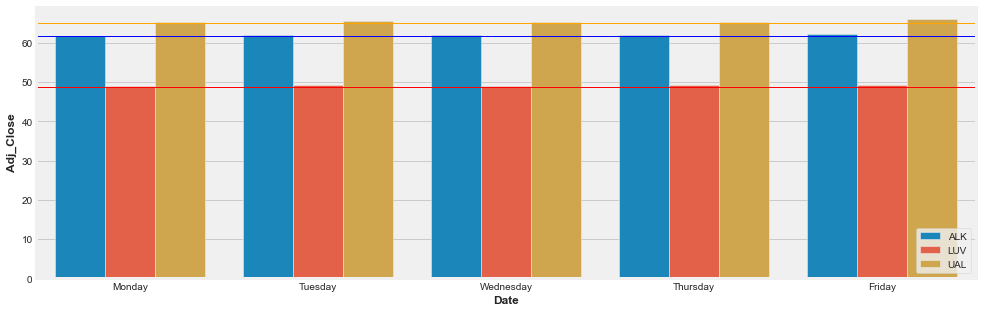

In [162]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

ALK_days = by_day(ALK)
ALK_days['Date'] = pd.Categorical(ALK_days['Date'], categories=cats, ordered=True)
ALK_days = ALK_days.sort_values('Date')
ALK_days["Company"]="ALK"

LUV_days = by_day(LUV)
LUV_days['Date'] = pd.Categorical(LUV_days['Date'], categories=cats, ordered=True)
LUV_days = LUV_days.sort_values('Date')
LUV_days["Company"]="LUV"

UAL_days = by_day(UAL)
UAL_days['Date'] = pd.Categorical(UAL_days['Date'], categories=cats, ordered=True)
UAL_days = UAL_days.sort_values('Date')
UAL_days["Company"]="UAL"

combined0 = ALK_days.append(LUV_days)
combined = combined0.append(UAL_days)


plt.figure(1,figsize=(15, 5))
sns.barplot(x="Date", y="Adj_Close", hue="Company", data=combined)
plt.legend(loc='lower right')
plt.axhline(48.7, 0,1, color="red", linewidth=1)
plt.axhline(61.8, 0,1, color="blue", linewidth=1)
plt.axhline(65.2, 0,1, color="orange", linewidth=1)

__Observations on Weekdays-Seasonality:__<br>
1. All companies stock price show very steady values in weekdays comparison
2. The hypothesis that the stock price of airlines might have a higher rating closer to the weekend (due to increased bookings for weekends) is proven to be mainly incorrect
3. There is a minor uptake in Fridays for UAL and ALK, merly noticable

#### Seasonality of Holidays

In [166]:
def by_holidays(df):
    winter_cond = (pd.DatetimeIndex(df['Date']).month == 12 and pd.DatetimeIndex(df['Date']).day >= 14)
    easter_cond = (pd.DatetimeIndex(df['Date']).month == 3 and pd.DatetimeIndex(df['Date']).day <= 14)
    summer_cond = (pd.DatetimeIndex(df['Date']).month == 6)
    
    
    df["holidays"] = np.where(winter_cond or easter_cond or summer_cond,1,0)
    return df2

In [171]:
by_holidays(ALK)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [179]:
# Define function for classifying the Dates into holidays
def f(row):
    if pd.DatetimeIndex(row["Date"]).month == 12 and pd.DatetimeIndex(row["Date"]).day >= 14:
        val = 1
    elif pd.DatetimeIndex(row["Date"]).month == 3 and pd.DatetimeIndex(row["Date"]).day <= 14:
        val = 1
    elif pd.DatetimeIndex(row["Date"]).month == 6:
        val = 1
    else:
        val = 0
    return val

# Create new column 'Holidays' using the function above
ALK['Holidays'] = ALK.apply(f, axis=1)

TypeError: DatetimeIndex() must be called with a collection of some kind, Timestamp('2016-04-11 00:00:00') was passed

In [170]:
pd.DatetimeIndex(ALK['Date']).month == 12 and pd.DatetimeIndex(ALK['Date']).day >= 14

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Thirdly, common holidays such as winter (last two weeks of Q4), easter (first two weeks of Q2) and summer breaks (mid four weeks of Q3) could have an influence on the airlines stockprices

------
## BACKUP

In [13]:
BTC = DataReader("BTC-USD", 'yahoo', start_time, end_time)
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-10,41420.191406,35984.628906,40254.218750,38356.441406,79980747690,38356.441406
2021-01-11,38346.531250,30549.599609,38346.531250,35566.656250,123320567399,35566.656250
2021-01-12,36568.527344,32697.976562,35516.359375,33922.960938,74773277909,33922.960938
2021-01-13,37599.960938,32584.667969,33915.121094,37316.359375,69364315979,37316.359375
2021-01-14,39966.406250,36868.562500,37325.109375,39187.328125,63615990033,39187.328125
...,...,...,...,...,...,...
2021-04-05,59479.578125,57646.808594,59171.933594,58192.359375,66058027988,58192.359375
2021-04-06,58731.144531,55604.023438,58186.507812,56048.937500,75645303584,56048.937500
2021-04-07,58338.738281,55879.085938,56099.914062,58323.953125,53053855641,58323.953125


In [14]:
jupyter labextension install jupyterlab-plotly

SyntaxError: invalid syntax (<ipython-input-14-923fc71b0f42>, line 1)

In [11]:
# @Nemanja: I was trying to make cufflink work but I had some toruble and it would not work. SO really happy if you spot the issue with it. (I'm just getting allm blank plots)
# Let's try another visualization package: Cufflinkz
cf.set_config_file(theme='pearl',sharing='public',offline=True)

# We have to convert the Date-Column to a datetime-object

ALK.iplot(kind="candle", keys=["Open", "High", "Low", "Close"], rangeslider=True)
#ALK.iplot(kind="ohlc", keys=["Open", "High", "Low", "Close"])
#qf.iplot()

# qf=cf.QuantFig(ALK,title='Alaska Airlines Quant Figure',legend='top',name='GS')
# qf.add_bollinger_bands()
# qf.add_volume()



In [12]:
ALK.iplot(
               keys=["Open", "High", "Low", "Close"],
               subplots=True,
               fill=True,
               xTitle="Date", yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")